In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [3]:
df = pd.read_csv('dataset/yield_df.csv')

In [4]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  str    
 1   Item                           28242 non-null  str    
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), str(2)
memory usage: 1.5 MB


In [7]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

<Axes: >

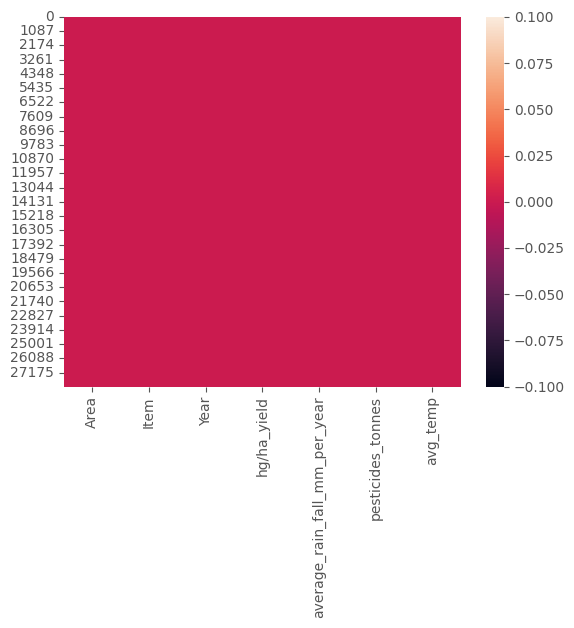

In [8]:
sns.heatmap(df.isnull())

In [8]:
df.duplicated().sum()

np.int64(2310)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(25932, 7)

In [12]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [13]:
df.corr(numeric_only=True)

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


In [14]:
len(df['Area'].unique())

101

In [15]:
len(df['Item'].unique())

10

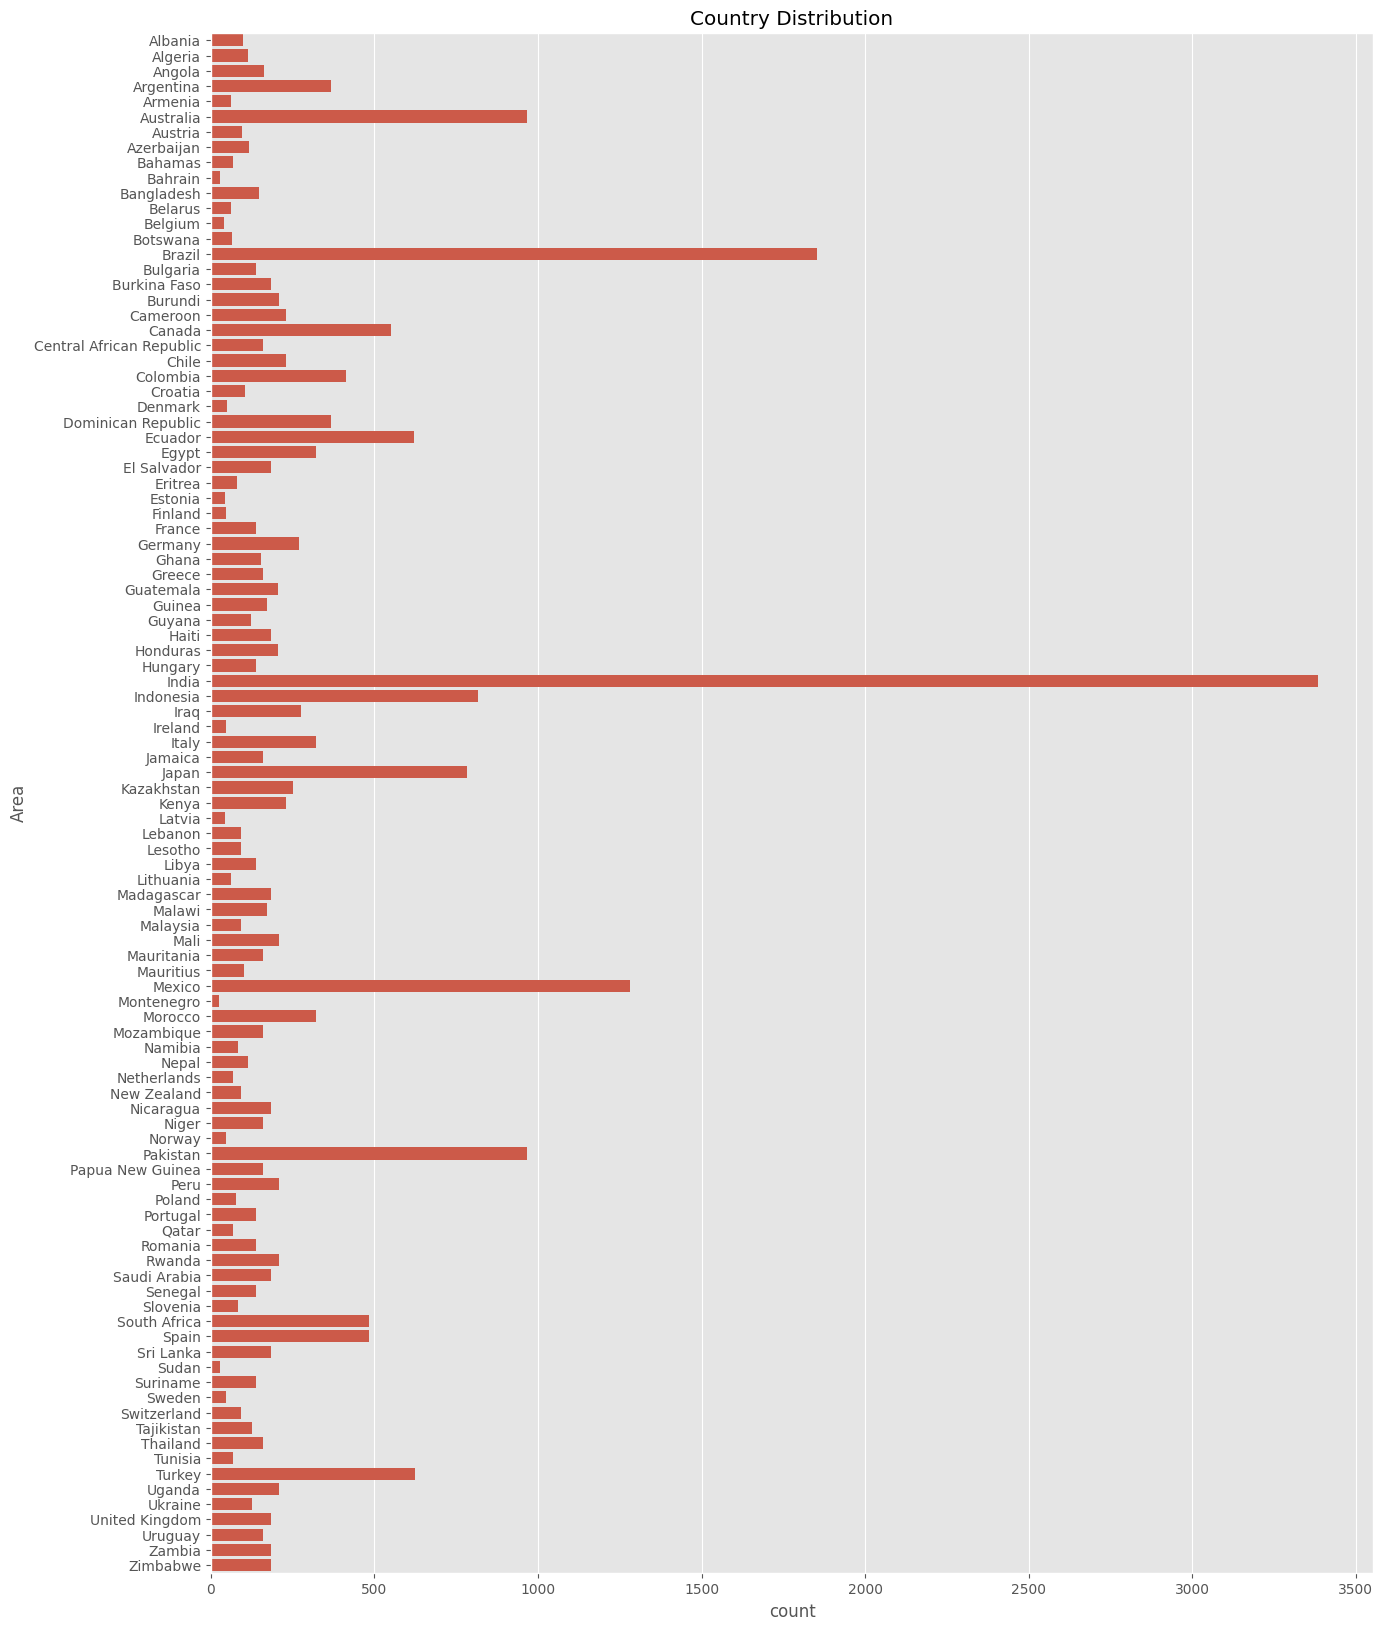

In [16]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.title("Country Distribution")
plt.show()

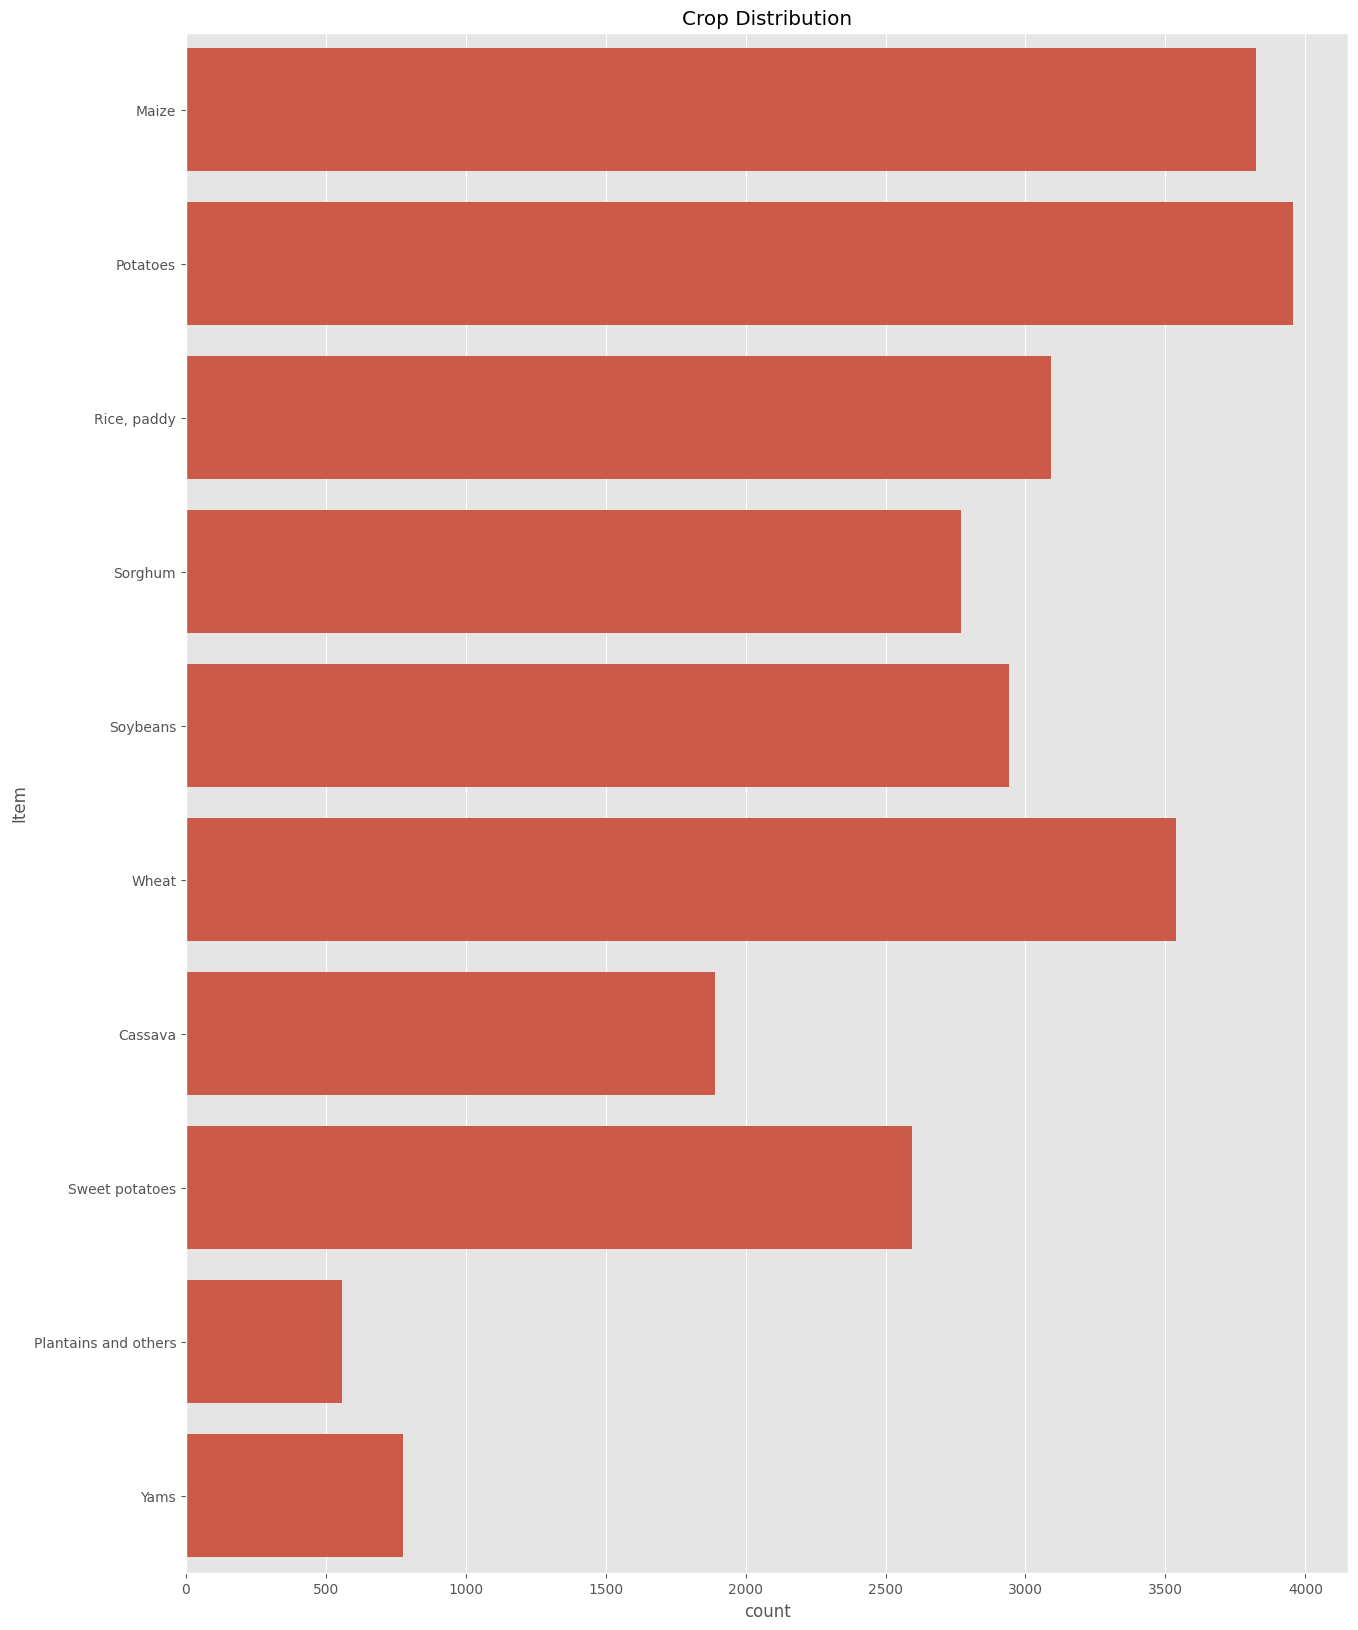

In [17]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Item'])
plt.title("Crop Distribution")
plt.show()

In [18]:
(df['Area'].value_counts() <400).sum()

np.int64(88)

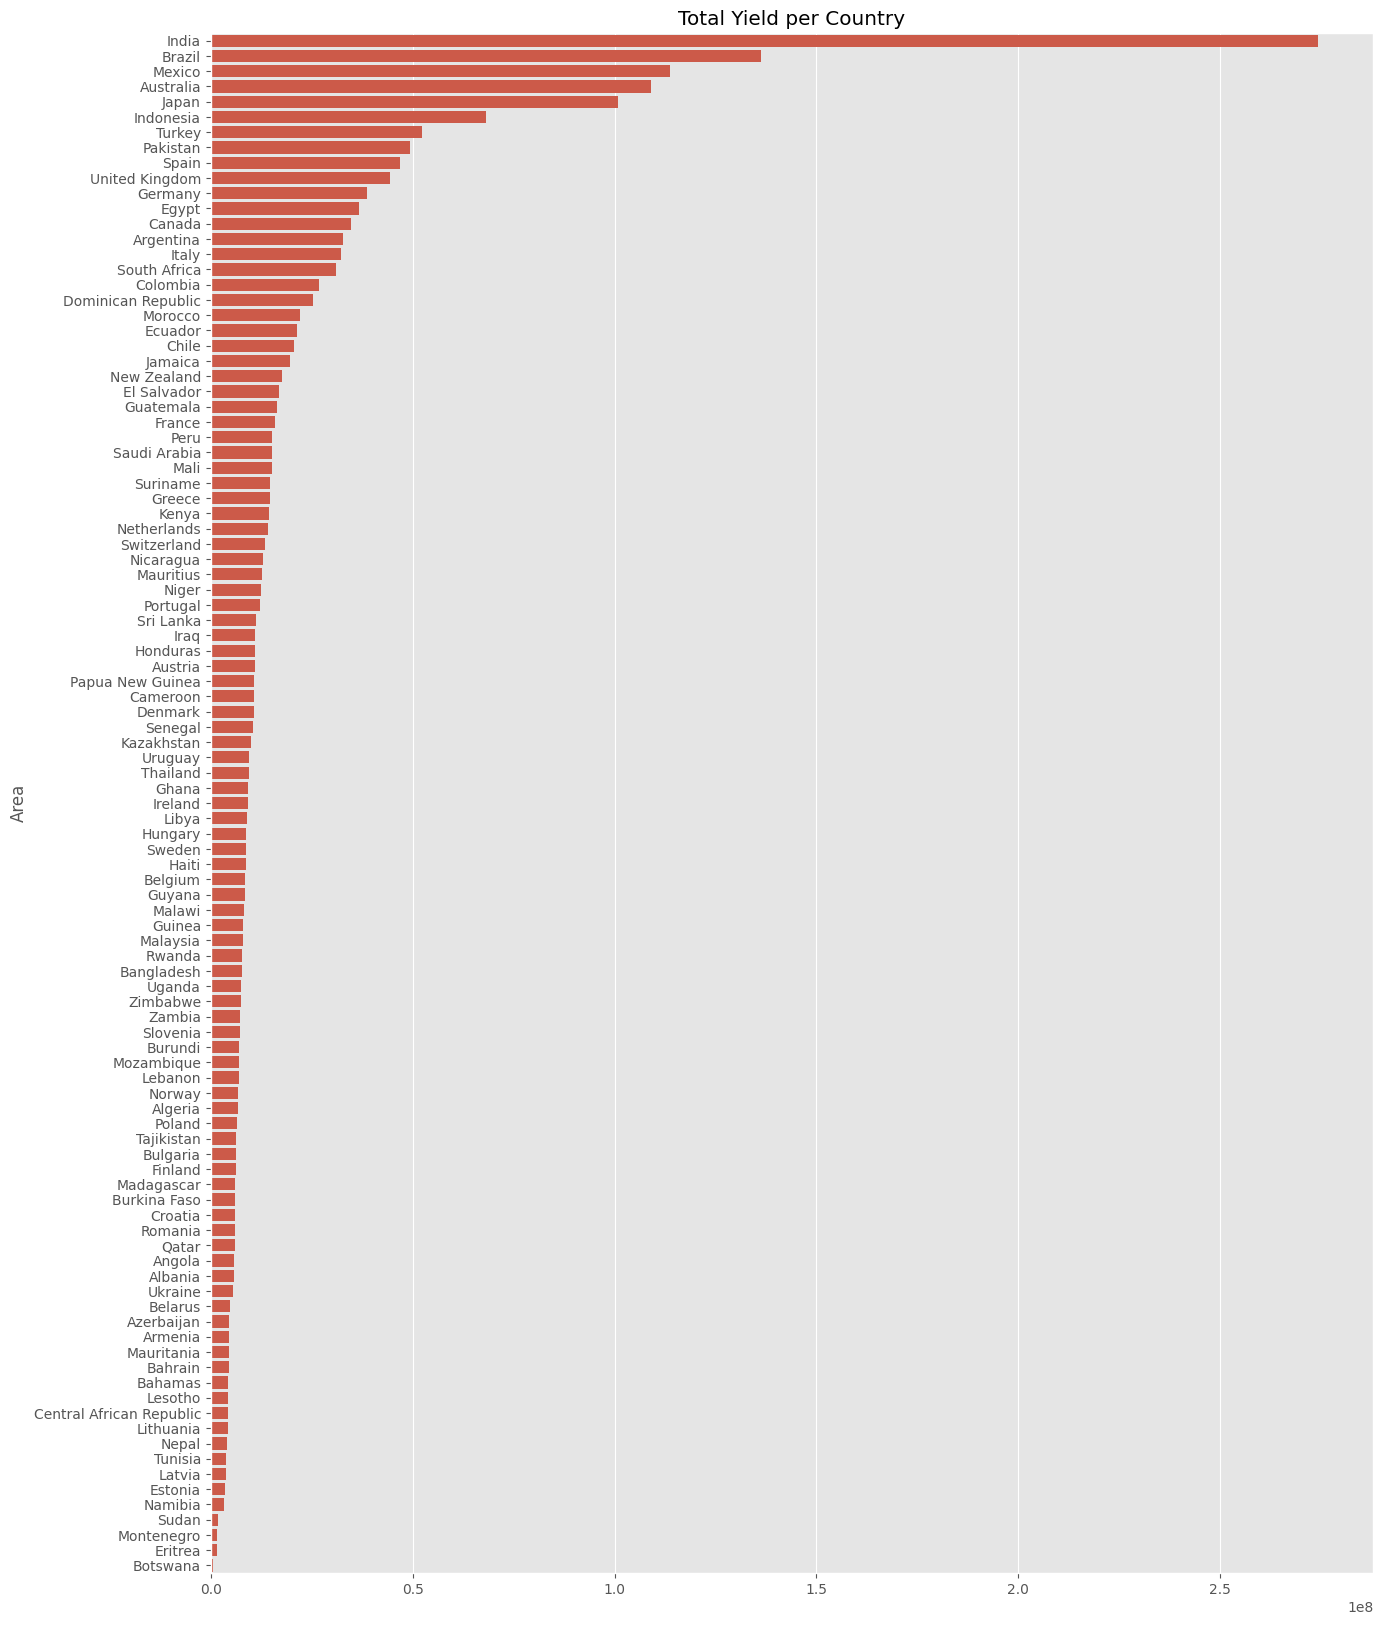

In [19]:
yield_per_country = (
    df.groupby('Area')['hg/ha_yield']
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(15,20))
sns.barplot(
    y=yield_per_country.index,
    x=yield_per_country.values
)
plt.title("Total Yield per Country")
plt.show()

In [20]:
df['hg/ha_yield'].sum()

np.int64(1996196943)

In [21]:
yield_per_country

Area
India         274219558
Brazil        136340329
Mexico        113698872
Australia     109111062
Japan         100924145
                ...    
Namibia         3165475
Sudan           1896346
Montenegro      1645100
Eritrea         1452416
Botswana         470651
Name: hg/ha_yield, Length: 101, dtype: int64

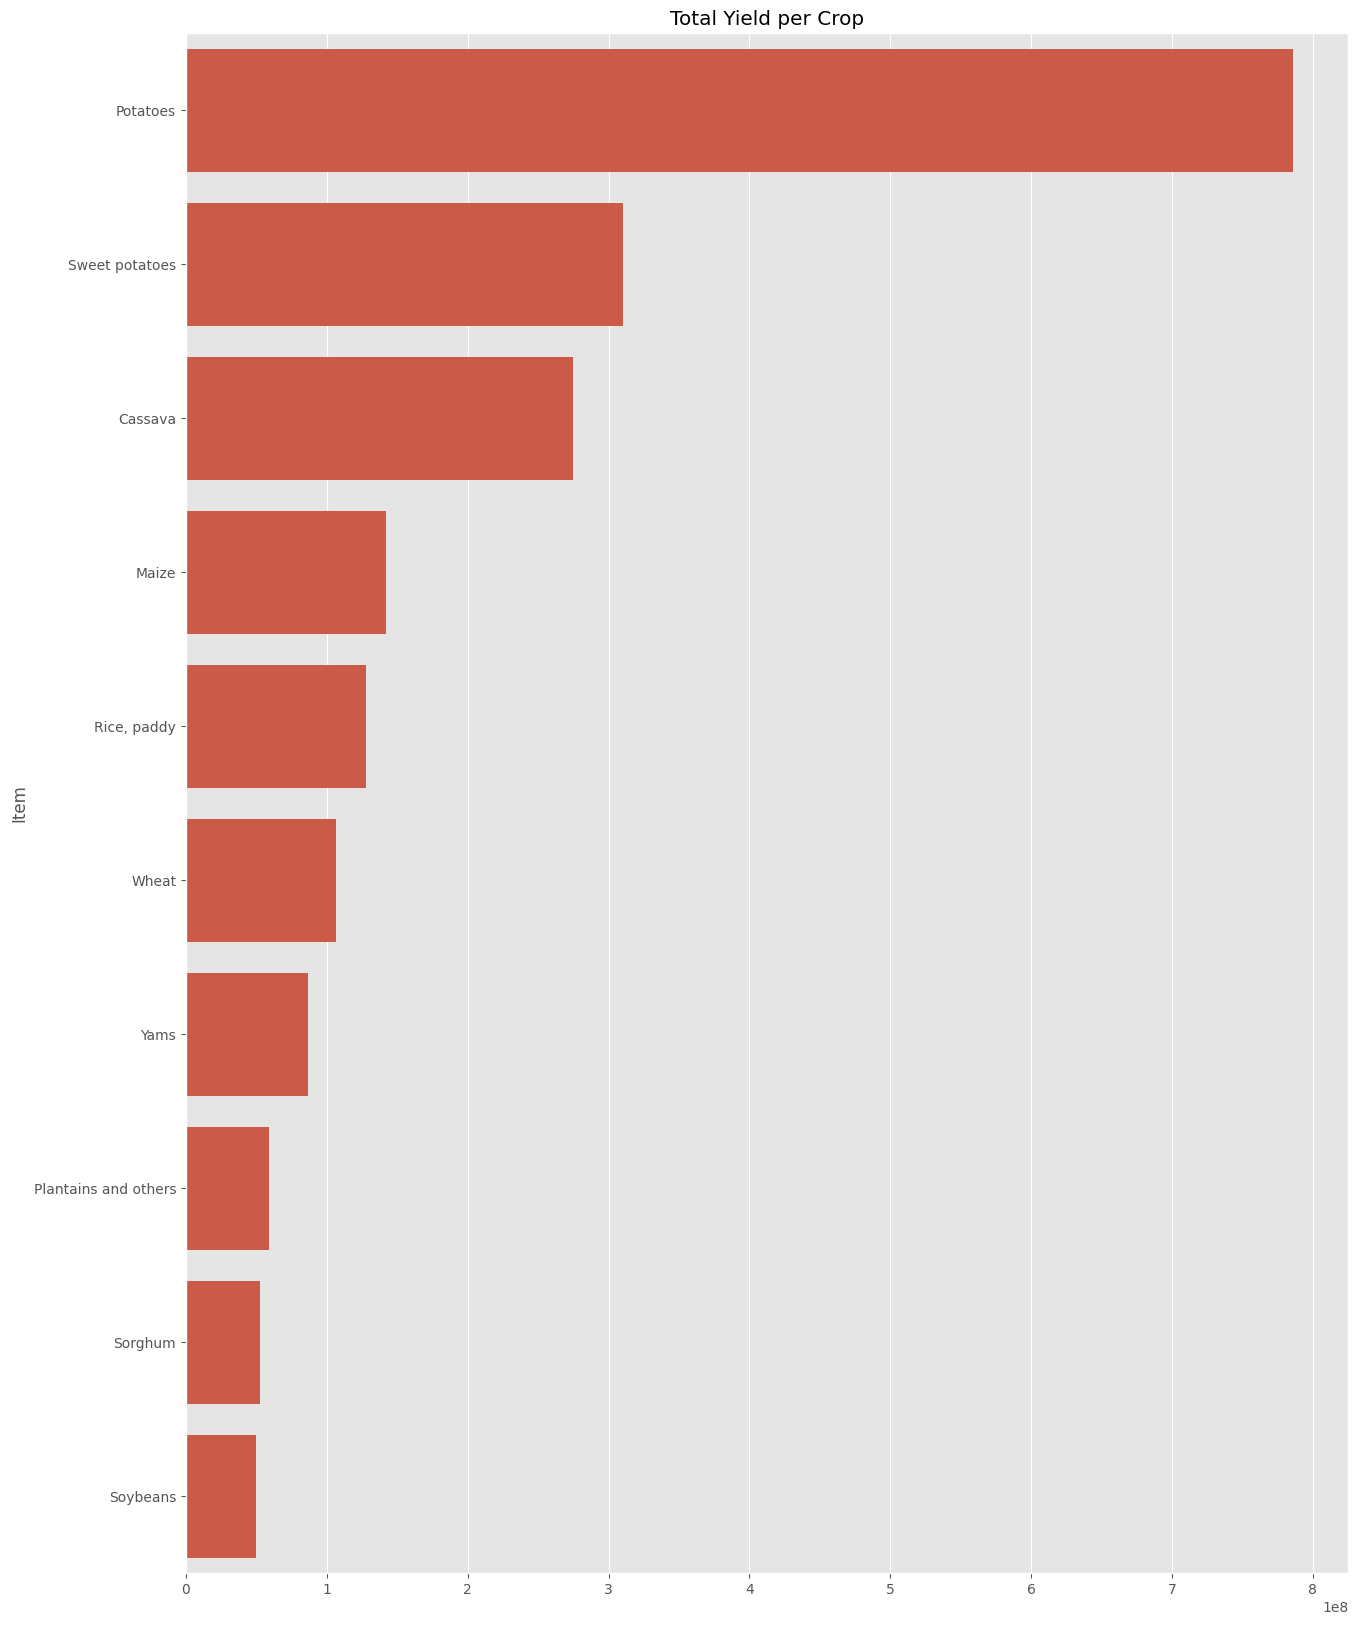

In [22]:
yield_per_crop = (
    df.groupby('Item')['hg/ha_yield']
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(15,20))
sns.barplot(
    y=yield_per_crop.index,
    x=yield_per_crop.values
)
plt.title("Total Yield per Crop")
plt.show()


In [23]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [24]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='str')

In [25]:
selected_columns = [
    'Year',
    'average_rain_fall_mm_per_year',
    'pesticides_tonnes',
    'avg_temp',
    'Area',
    'Item',
    'hg/ha_yield'
]

df = df[selected_columns]
df.head()


,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [27]:
train_df = df[df['Year'] <= 2012]
test_df  = df[df['Year'] > 2012]

X_train = train_df.drop('hg/ha_yield', axis=1)
y_train = train_df['hg/ha_yield']

X_test = test_df.drop('hg/ha_yield', axis=1)
y_test = test_df['hg/ha_yield']


In [28]:
num_features = [
    'Year',
    'average_rain_fall_mm_per_year',
    'pesticides_tonnes',
    'avg_temp'
]

cat_features = ['Area', 'Item']


In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ]
)


In [30]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(
        max_depth=12,
        min_samples_leaf=10,
        random_state=42
    ),
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        max_depth=15,
        random_state=42,
        n_jobs=-1
    )
}


In [32]:
for name, model in models.items():

    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{name}")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2  : {r2:.3f}")
    print("-" * 40)


Linear Regression
MAE : 34223.17
RMSE: 49988.89
R2  : 0.732
----------------------------------------
Ridge Regression
MAE : 34190.11
RMSE: 49999.02
R2  : 0.732
----------------------------------------
Decision Tree
MAE : 17740.91
RMSE: 30834.37
R2  : 0.898
----------------------------------------
Random Forest
MAE : 12503.83
RMSE: 21999.48
R2  : 0.948
----------------------------------------


In [33]:
final_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=300,
        max_depth=15,
        random_state=42,
        n_jobs=-1
    ))
])

final_model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [34]:
def predict_yield(year, rainfall, pesticides, temp, area, crop):

    input_df = pd.DataFrame([{
        'Year': year,
        'average_rain_fall_mm_per_year': rainfall,
        'pesticides_tonnes': pesticides,
        'avg_temp': temp,
        'Area': area,
        'Item': crop
    }])

    return final_model.predict(input_df)[0]


In [35]:
result = predict_yield(1990,1485.0,121.0,16.37,'Albania','Maize')
result

np.float64(20389.333190198766)

In [36]:
import pickle

with open("crop_yield_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

print("Model saved successfully")

Model saved successfully
